In [4]:
from fastai.data.external import *
from fastbook import *
from fastai.vision.widgets import *
from dotenv import load_dotenv

In [7]:
key_azure = os.environ.get('AZURE_SEARCH_KEY')
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

## Dog Classifier Notebook
This notebook will be used to **acquire, clean, and label** the dog dataset; then the model will be trained and exported.

In [20]:
wiener_dogs = search_images_bing(key_azure, 'wiener dog') if wiener_dogs is None else wiener_dogs

(#150) [{'webSearchUrl': 'https://www.bing.com/images/search?view=detailv2&FORM=OIIRPO&q=wiener+dog&id=96B15FBE9A812F135E0BC1B367715765F1432ABC&simid=608048416186002798', 'name': 'Wiener dog cheats to win this race | The Daily Dot', 'thumbnailUrl': 'https://tse2.mm.bing.net/th?id=OIP.0jN7zlIHwWk9wO_42eJsBQHaDt&pid=Api', 'datePublished': '2021-03-03T17:31:00.0000000Z', 'isFamilyFriendly': True, 'contentUrl': 'https://www.dailydot.com/wp-content/uploads/751/58/3c599da7ec74013ce3fc4e172e38ef58.jpg', 'hostPageUrl': 'https://www.dailydot.com/unclick/dogs-cheats-race/', 'contentSize': '1738441 B', 'encodingFormat': 'jpeg', 'hostPageDisplayUrl': 'https://www.dailydot.com/unclick/dogs-cheats-race', 'width': 2048, 'height': 1024, 'hostPageFavIconUrl': 'https://www.bing.com/th?id=ODF.eeaWPO-FEkIboS0hJ7Ct4A&pid=Api', 'hostPageDomainFriendlyName': 'The Daily Dot', 'hostPageDiscoveredDate': '2017-03-29T00:00:00.0000000Z', 'thumbnail': {'width': 474, 'height': 237}, 'imageInsightsToken': 'ccid_0jN7z

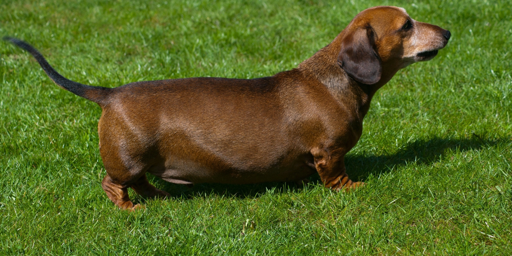

In [21]:
dest_ex = 'images/wiener_dog.jpg'
download_url(wiener_dogs[0]['contentUrl'], dest_ex)

im = Image.open(dest_ex)
im.to_thumb(512, 512)

In [25]:
dog_path = Path('dogs')
dog_classes = 'hot dog','corn dog','wiener dog'

('hot dogs', 'corn dogs', 'wiener dogs')

In [27]:
if not dog_path.exists():
    dog_path.mkdir()
    for label in dog_classes:
        destination = (dog_path/label.replace(' ', "_"))
        destination.mkdir(exist_ok=True)
        results = search_images_bing(key_azure, label)
        download_images(destination, urls=results.attrgot('contentUrl'))

In [28]:
fps =  get_image_files(destination)

(#143) [Path('dogs/wiener dogs/540a4e63-0c34-4f0b-bc49-22cbcf0fe3f4.jpg'),Path('dogs/wiener dogs/a90dc925-a75a-47b1-acae-fedbd59acd52.jpg'),Path('dogs/wiener dogs/f5062576-0b50-4a78-8a1f-ed6c732ae1a4.jpg'),Path('dogs/wiener dogs/50d8a8e8-cec5-43c6-b44c-2350bf4171e9.jpg'),Path('dogs/wiener dogs/b9797c1a-a210-466a-a5fc-f1acb83f8bb9.jpg'),Path('dogs/wiener dogs/6b98cf91-984f-4e68-a17b-5858b5f95f39.jpg'),Path('dogs/wiener dogs/e0cb3b34-0c27-43cc-9d6e-4b64fab3f9b0.jpg'),Path('dogs/wiener dogs/7b4c0758-8d51-400f-aa3e-35bd9cfaf17b.jpg'),Path('dogs/wiener dogs/eb50efcc-2dc3-428c-aa9e-fa11b214f6b4.jpg'),Path('dogs/wiener dogs/6bc5a0ef-6e92-448a-af74-b1a0a0d8862e.png')...]